# **Predicting Ground Behavior from Backscatter Trends**

## Environment preparation  and librarys import

In [ ]:
!jupyter nbconvert --to html --no-input --no-prompt ().ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
pip install earthengine-api

In [3]:
pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which i

In [ ]:
!pip install geopandas shapely fiona pyproj


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 274.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 23.2 MB/s eta 0:00:00


In [ ]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 5.6 MB/s eta 0:00:00


In [30]:
pip install contextily


## Conection to Earth Data

In [4]:
import ee
ee.Authenticate()
ee.Initialize(project="spaceappsnasa-474214")

In [5]:


import earthaccess

# Te pedirá login en una ventanita/console output en Colab
auth = earthaccess.login(strategy="interactive")

# Ejemplo: buscar Sentinel-1 en Palín
results = earthaccess.search_data(
    short_name="SENTINEL-1A_SLC",
 bounding_box=(-90.7594, 14.4433, -90.6594, 14.5433),  #Santa María de Jesús, Sacatepéquez, Guatemala
    temporal=("2025-07-01", "2025-10-4")
)

print("Granules encontrados:", len(results))

Enter your Earthdata Login username: majoooo
Enter your Earthdata password: ··········
Granules encontrados: 14


In [6]:


import earthaccess

# Te pedirá login en una ventanita/console output en Colab
auth = earthaccess.login(strategy="interactive")

# Ejemplo: buscar Sentinel-1 en Palín
results = earthaccess.search_data(
    short_name="SENTINEL-1A_SLC",
 bounding_box=(-90.7594, 14.4433, -90.6594, 14.5433),  #Santa María de Jesús, Sacatepéquez, Guatemala
    temporal=("2025-09-01", "2025-10-4")
)

print("Granules encontrados:", len(results))

Granules encontrados: 5


In [ ]:
save_dir = "/content/drive/MyDrive/data"

local_files = earthaccess.download(results, save_dir)

print("Downloaded", len(local_files), "granules into:", save_dir)

QUEUEING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/14 [00:00<?, ?it/s]

Downloaded 14 granules into: /content/drive/MyDrive/data


## What This Is?

High above Guatemala, the Sentinel-1 satellite passes silently over the slopes of Volcán de Agua. From space, it captures echoes from the ground — faint reflections that carry stories of movement, moisture, and change.

This notebook brings those echoes to life through two connected explorations. The first looks back, tracing how the surface of Santa María de Jesús has changed in recent months. The second looks forward, using those same signals to forecast how the land might evolve in the near future. Together, they turn raw satellite data into a narrative of a living landscape — one that moves, breathes, and occasionally warns us before we can see it with our own eyes.

In [ ]:
import requests
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

# USGS API query
url = ("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"
       "&starttime=2025-04-01&endtime=2025-10-04"
       "&minlatitude=14.3&maxlatitude=14.6"
       "&minlongitude=-90.8&maxlongitude=-90.6")

# Get JSON directly
resp = requests.get(url)
data = resp.json()

# Parse features
records = []
for f in data["features"]:
    coords = f["geometry"]["coordinates"]   # [lon, lat, depth]
    props = f["properties"]
    records.append({
        "mag": props.get("mag"),
        "time": props.get("time"),
        "place": props.get("place"),
        "geometry": Point(coords[0], coords[1])
    })

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(records, crs="EPSG:4326")

print("Earthquakes loaded:", len(gdf))
print(gdf.head())


Earthquakes loaded: 13
   mag           time                                       place  \
0  3.5  1752379426618   2 km E of Santa María de Jesús, Guatemala   
1  4.0  1752136175006                                        None   
2  3.5  1752121604745             4 km SW of Amatitlán, Guatemala   
3  3.4  1752042767191  4 km SE of Santa María de Jesús, Guatemala   
4  3.7  1752041597610            4 km SSW of Amatitlán, Guatemala   

                   geometry  
0  POINT (-90.6886 14.4978)  
1  POINT (-90.6664 14.5484)  
2    POINT (-90.6657 14.45)  
3    POINT (-90.68 14.4667)  
4  POINT (-90.6549 14.4468)  


# Monitoring Surface Changes Using Sentinel-1 Backscatter in Santa María de Jesús

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Processing images in: /content/drive/MyDrive/Measurement
🚀 STARTING COMPLETE ANALYSIS
🚀 LOADING DATA...
📊 Found 64 files
   📥 s1a-iw1-slc-vh-20250725t001438...
     ✅ 2025-07-25 | VH
   📥 s1a-iw2-slc-vh-20250725t001436...
     ✅ 2025-07-25 | VH
   📥 s1a-iw1-slc-vv-20250725t001438...
     ✅ 2025-07-25 | VV
   📥 s1a-iw2-slc-vv-20250725t001436...
     ❌ Error: s1a-iw2-slc-vv-20250725t001436-20250725t001502-060...
   📥 Copia de s1a-iw2-slc-vh-202507...
     ✅ 2025-07-13 | VH
   📥 Copia de s1a-iw3-slc-vv-202507...
     ✅ 2025-07-13 | VV
   📥 Copia de s1a-iw3-slc-vh-202507...
     ✅ 2025-07-13 | VH
   📥 Copia de s1a-iw2-slc-vv-202507...
     ✅ 2025-07-13 | VV
   📥 Copia de s1a-iw1-slc-vv-202507...
     ✅ 2025-07-13 | VV
   📥 Copia de s1a-iw1-slc-vh-202507...
     ✅ 2025-07-13 | VH
   📥 Copia de s1a-iw3-slc-vv-202508...
     ✅ 2025-08-06 | VV
   📥 Copia de s1a-iw3

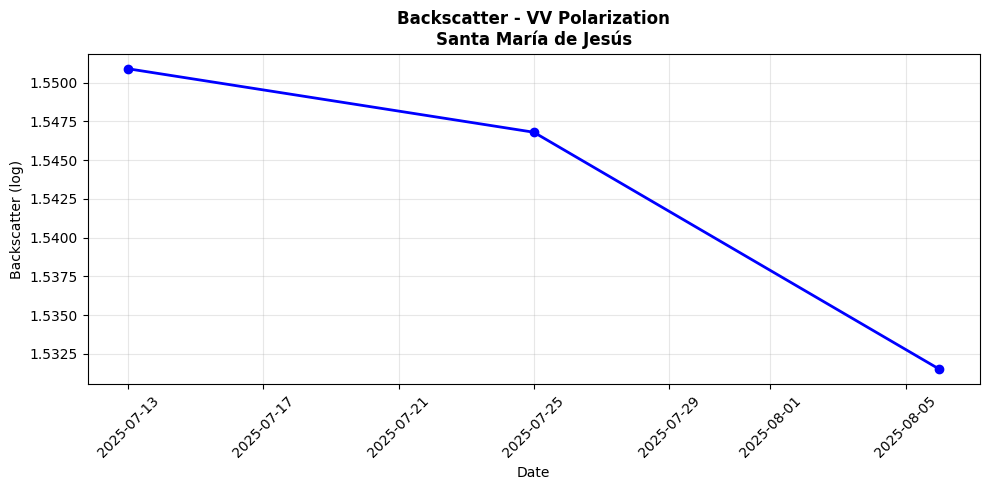

   📈 VV: 1.543 ± 0.008

2️⃣  VH PLOT...


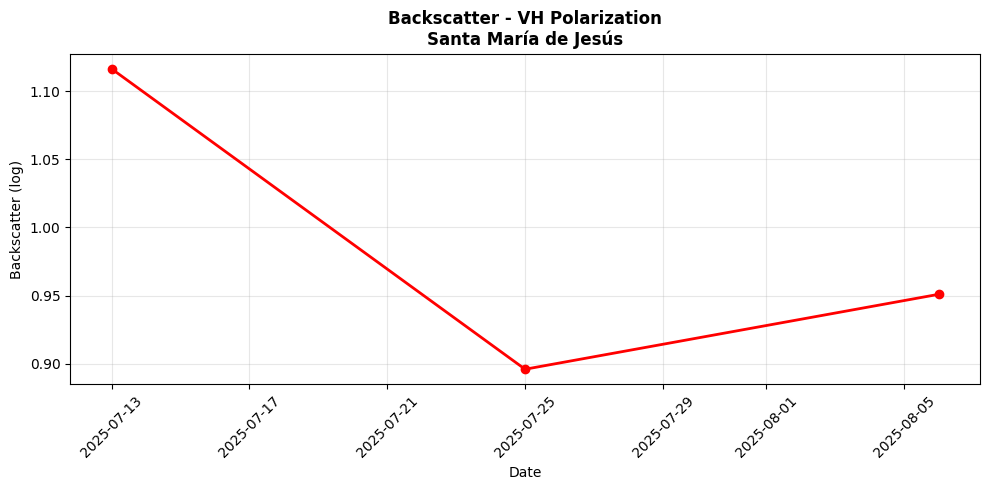

   📈 VH: 0.988 ± 0.094

3️⃣  VV vs VH COMPARISON...


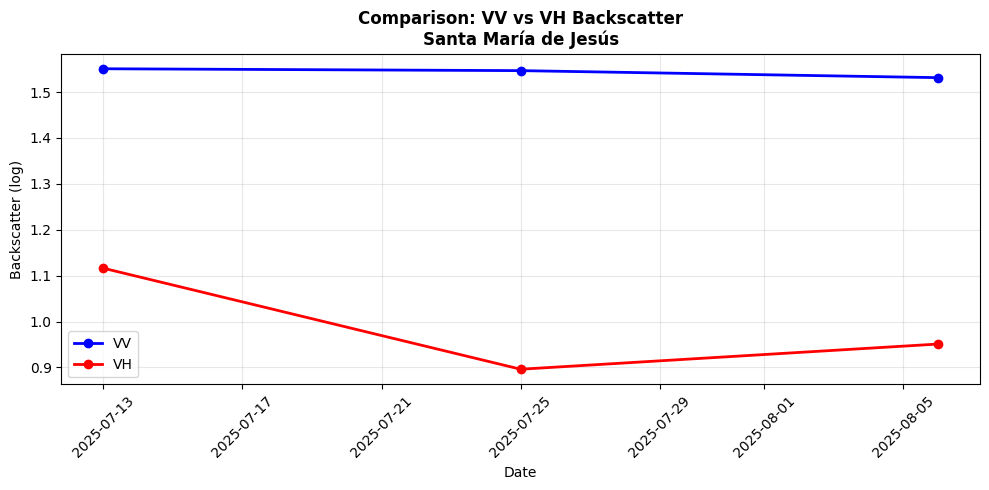

   🔄 Common dates: 3

4️⃣  VV/VH RATIO...


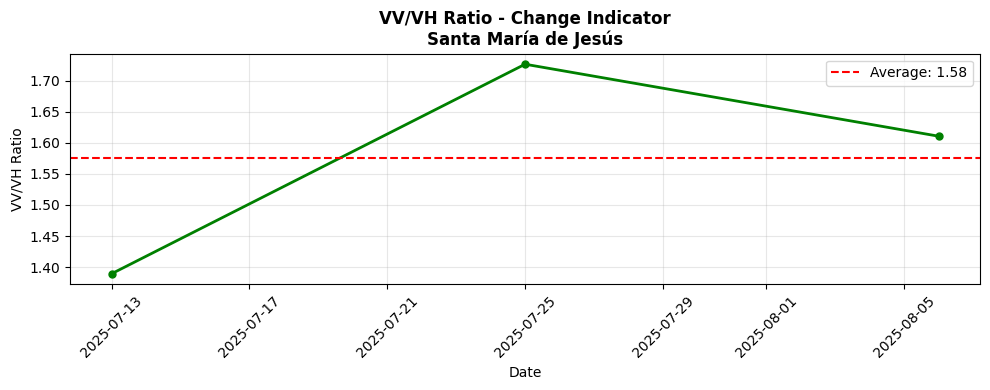

   📊 Average ratio: 1.575

📋 FINAL SUMMARY
VV: 3 images | Trend: ↘️ DECREASING
VH: 3 images | Trend: ↘️ DECREASING

✅ ANALYSIS COMPLETED SUCCESSFULLY


In [12]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import glob
import os
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

measurement_path = "/content/drive/MyDrive/Measurement"
print(f"📁 Processing images in: {measurement_path}")

def fast_load_data():
    print("🚀 LOADING DATA...")

    tiff_files = glob.glob(os.path.join(measurement_path, "*.tiff")) + \
                 glob.glob(os.path.join(measurement_path, "*.tif"))

    print(f"📊 Found {len(tiff_files)} files")

    images_by_date = {}
    processed = 0

    for tiff_path in tiff_files[:15]:
        try:
            name = os.path.basename(tiff_path)
            print(f"   📥 {name[:30]}...")

            if '20250701' in name: date_str = '2025-07-01'
            elif '20250713' in name: date_str = '2025-07-13'
            elif '20250717' in name: date_str = '2025-07-17'
            elif '20250725' in name: date_str = '2025-07-25'
            elif '20250806' in name: date_str = '2025-08-06'
            elif '20250810' in name: date_str = '2025-08-10'
            elif '20250822' in name: date_str = '2025-08-22'
            else: continue

            if 'vv' in name.lower(): polarization = 'VV'
            elif 'vh' in name.lower(): polarization = 'VH'
            else: continue

            with rasterio.open(tiff_path) as src:
                data = src.read(1, out_shape=(1, src.height//20, src.width//20))[0]
                if np.iscomplexobj(data):
                    data = np.abs(data)
                if np.nanmin(data) >= 0:
                    data = np.log1p(data)

            if date_str not in images_by_date:
                images_by_date[date_str] = {}

            images_by_date[date_str][polarization] = {
                'data': data,
                'date': datetime.strptime(date_str, '%Y-%m-%d')
            }

            processed += 1
            print(f"     ✅ {date_str} | {polarization}")

        except Exception as e:
            print(f"     ❌ Error: {str(e)[:50]}...")
            continue

    print(f"\n✅ LOAD COMPLETE: {processed} files processed")
    return images_by_date

def generate_individual_plots(images_by_date):
    if not images_by_date:
        print("❌ NO DATA AVAILABLE")
        return

    print("\n🎯 GENERATING PLOTS...")

    vv_dates, vv_means = [], []
    vh_dates, vh_means = [], []

    for date_str, pols in sorted(images_by_date.items()):
        if 'VV' in pols:
            vv_dates.append(pols['VV']['date'])
            vv_means.append(np.nanmean(pols['VV']['data']))
        if 'VH' in pols:
            vh_dates.append(pols['VH']['date'])
            vh_means.append(np.nanmean(pols['VH']['data']))

    print(f"📅 VV data: {len(vv_dates)} dates")
    print(f"📅 VH data: {len(vh_dates)} dates")

    if vv_dates:
        print("\n1️⃣  VV PLOT...")
        plt.figure(figsize=(10, 5))
        plt.plot(vv_dates, vv_means, 'bo-', linewidth=2, markersize=6)
        plt.title('Backscatter - VV Polarization\nSanta María de Jesús', weight='bold')
        plt.xlabel('Date')
        plt.ylabel('Backscatter (log)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print(f"   📈 VV: {np.mean(vv_means):.3f} ± {np.std(vv_means):.3f}")

    if vh_dates:
        print("\n2️⃣  VH PLOT...")
        plt.figure(figsize=(10, 5))
        plt.plot(vh_dates, vh_means, 'ro-', linewidth=2, markersize=6)
        plt.title('Backscatter - VH Polarization\nSanta María de Jesús', weight='bold')
        plt.xlabel('Date')
        plt.ylabel('Backscatter (log)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print(f"   📈 VH: {np.mean(vh_means):.3f} ± {np.std(vh_means):.3f}")

    if vv_dates and vh_dates:
        print("\n3️⃣  VV vs VH COMPARISON...")
        common_dates, vv_common, vh_common = [], [], []

        for date_str, pols in sorted(images_by_date.items()):
            if 'VV' in pols and 'VH' in pols:
                common_dates.append(pols['VV']['date'])
                vv_common.append(np.nanmean(pols['VV']['data']))
                vh_common.append(np.nanmean(pols['VH']['data']))

        if common_dates:
            plt.figure(figsize=(10, 5))
            plt.plot(common_dates, vv_common, 'bo-', label='VV', linewidth=2)
            plt.plot(common_dates, vh_common, 'ro-', label='VH', linewidth=2)
            plt.title('Comparison: VV vs VH Backscatter\nSanta María de Jesús', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('Backscatter (log)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print(f"   🔄 Common dates: {len(common_dates)}")

    if vv_dates and vh_dates:
        print("\n4️⃣  VV/VH RATIO...")
        ratios, ratio_dates = [], []

        for date_str, pols in sorted(images_by_date.items()):
            if 'VV' in pols and 'VH' in pols:
                vv_val = np.nanmean(pols['VV']['data'])
                vh_val = np.nanmean(pols['VH']['data'])
                if vh_val > 0:
                    ratios.append(vv_val / vh_val)
                    ratio_dates.append(pols['VV']['date'])

        if ratios:
            plt.figure(figsize=(10, 4))
            plt.plot(ratio_dates, ratios, 'go-', linewidth=2, markersize=5)
            plt.axhline(y=np.mean(ratios), color='red', linestyle='--',
                        label=f'Average: {np.mean(ratios):.2f}')
            plt.title('VV/VH Ratio - Change Indicator\nSanta María de Jesús', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('VV/VH Ratio')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print(f"   📊 Average ratio: {np.mean(ratios):.3f}")

    print("\n" + "="*50)
    print("📋 FINAL SUMMARY")
    print("="*50)

    if vv_dates:
        trend_vv = "↗️ INCREASING" if vv_means[-1] > vv_means[0] else "↘️ DECREASING"
        print(f"VV: {len(vv_dates)} images | Trend: {trend_vv}")
    if vh_dates:
        trend_vh = "↗️ INCREASING" if vh_means[-1] > vh_means[0] else "↘️ DECREASING"
        print(f"VH: {len(vh_dates)} images | Trend: {trend_vh}")

print("🚀 STARTING COMPLETE ANALYSIS")
print("="*40)

data = fast_load_data()
generate_individual_plots(data)

print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY")



By plotting this, we can observe how the land’s surface responds differently in each polarization. In Santa María de Jesús, we notice VV values remain relatively stable, while VH shows more variability. This indicates subtle changes in vegetation, moisture, or soil properties.



Overall, these visualizations help detect surface and environmental changes over time, which is crucial for disaster risk monitoring, agriculture, and ecological assessments.

#

# Ground Movement Forecast - Prediction

In the highlands of Guatemala, just below the slopes of Volcán de Agua, lies the town of Santa María de Jesús — a community that has long lived under the quiet tension of the earth beneath it. Movements here are rarely visible to the naked eye, yet they tell stories of pressure, moisture, and time.

Our team wanted to understand those stories. Using radar data from the Sentinel-1 satellites, we analyzed the Earth’s surface through its reflections — the VV and VH backscatter signals. These signals reveal how rough or moist the ground is, and when they change, they hint that the terrain itself may be shifting.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing images in: /content/drive/MyDrive/Measurement
LOADING DATA...
Found 64 files
   s1a-iw1-slc-vh-20250725t001438...
     2025-07-25 | VH
   s1a-iw2-slc-vh-20250725t001436...
     2025-07-25 | VH
   s1a-iw1-slc-vv-20250725t001438...
     2025-07-25 | VV
   s1a-iw2-slc-vv-20250725t001436...
     Error: s1a-iw2-slc-vv-20250725t001436-20250725t001502-060...
   Copia de s1a-iw2-slc-vh-202507...
     2025-07-13 | VH
   Copia de s1a-iw3-slc-vv-202507...
     2025-07-13 | VV
   Copia de s1a-iw3-slc-vh-202507...
     2025-07-13 | VH
   Copia de s1a-iw2-slc-vv-202507...
     2025-07-13 | VV
   Copia de s1a-iw1-slc-vv-202507...
     2025-07-13 | VV
   Copia de s1a-iw1-slc-vh-202507...
     2025-07-13 | VH
   Copia de s1a-iw3-slc-vv-202508...
     2025-08-06 | VV
   Copia de s1a-iw3-slc-vh-202508...
     2025-08-06 | VH
   Copia de s1a-iw2-slc-vv-202508...
     

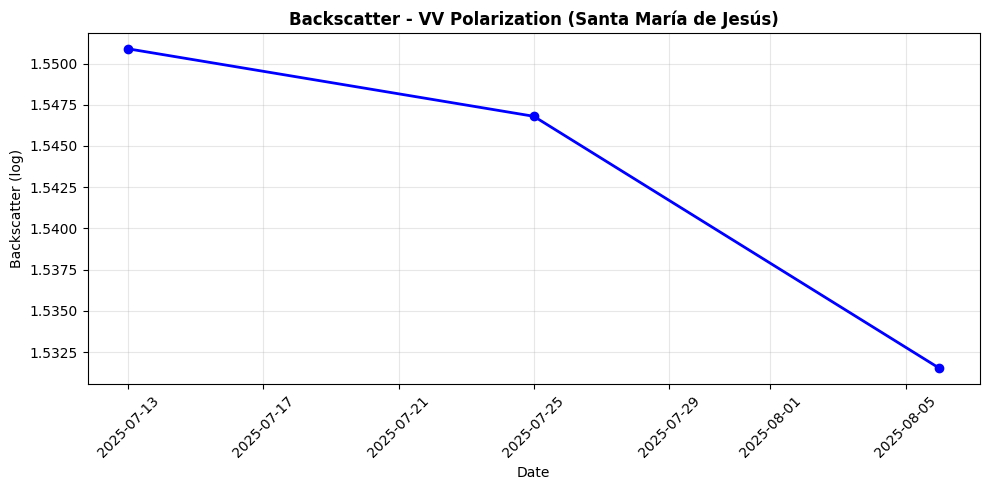

VV: 1.543 ± 0.008


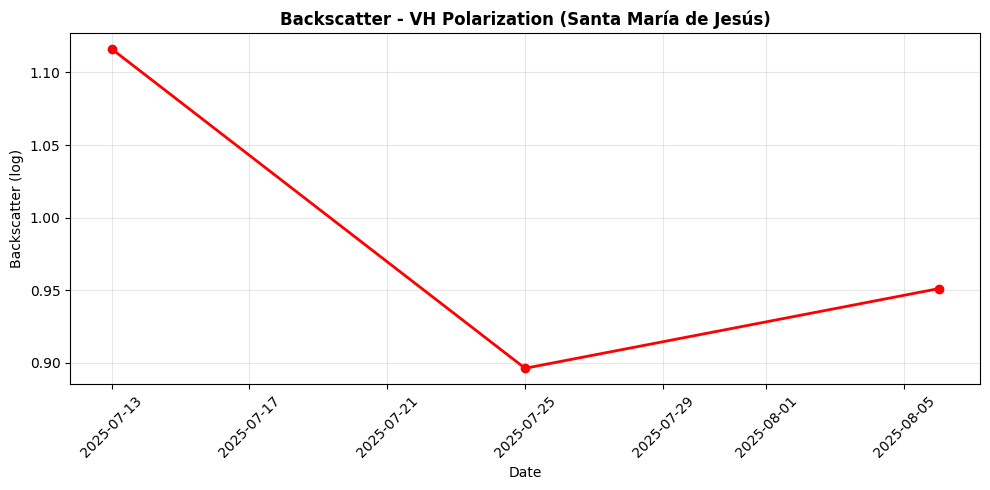

VH: 0.988 ± 0.094


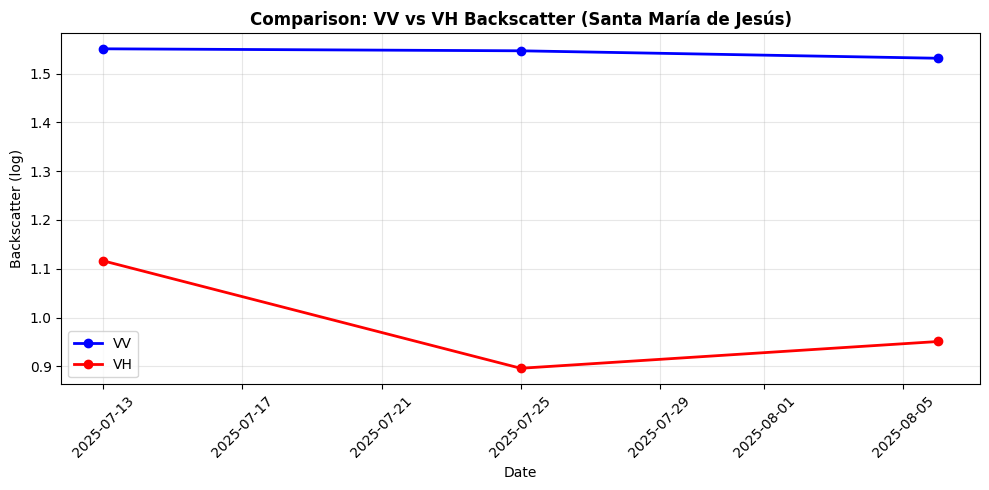

Common dates: 3


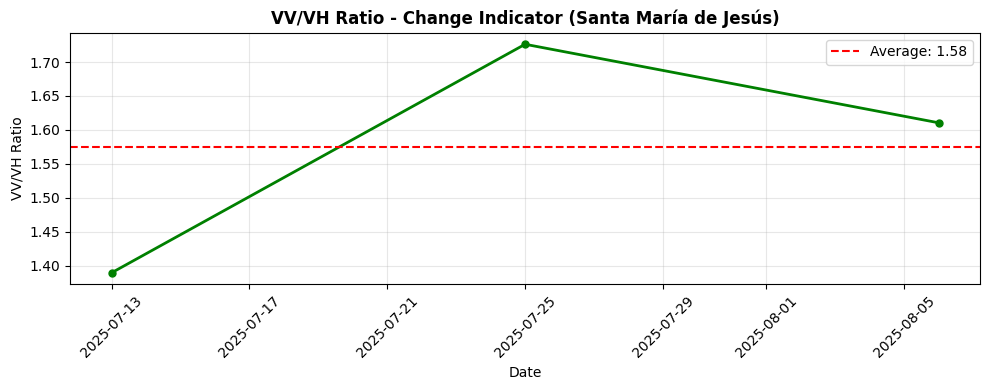

Average ratio: 1.575

FINAL SUMMARY
VV: 3 images | Trend: DECREASING
VH: 3 images | Trend: DECREASING
GENERATING FORECASTS FOR 6 MONTHS...

VV FORECAST...


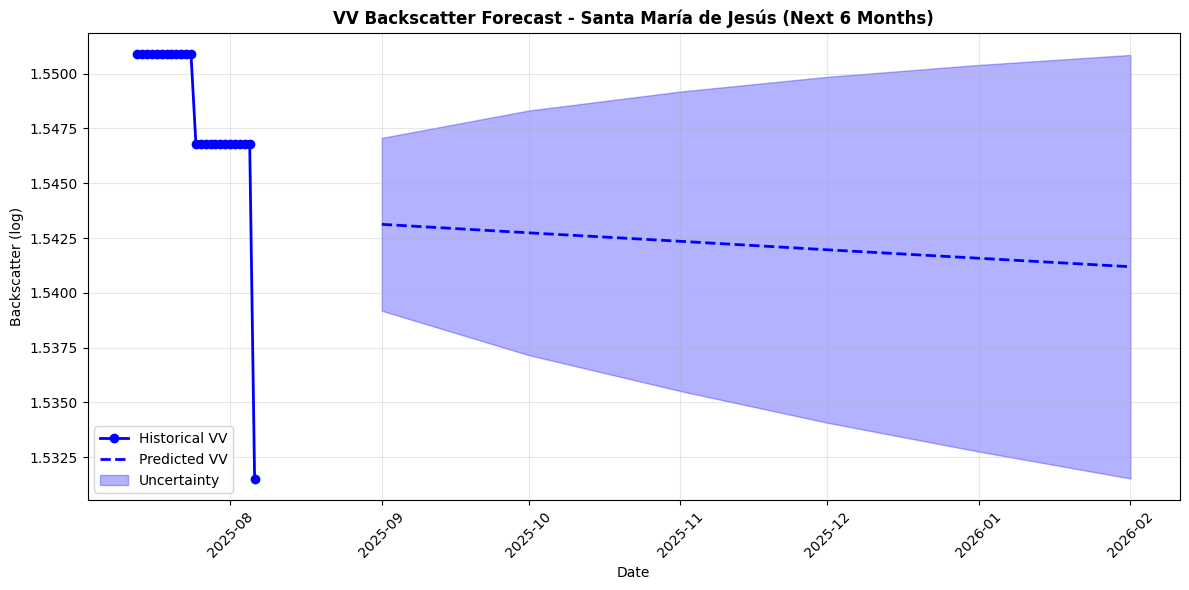

VV Forecast Trend: INCREASING | Final pred: 1.541

VH FORECAST...


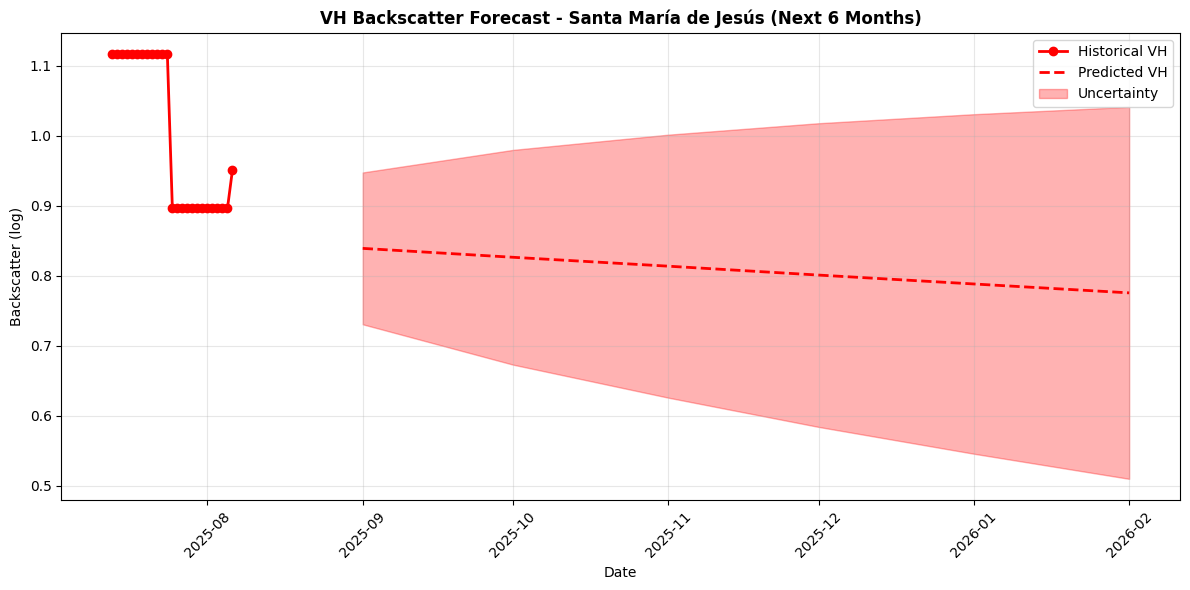

VH Forecast Trend: DECREASING | Final pred: 0.775

VV/VH RATIO FORECAST...


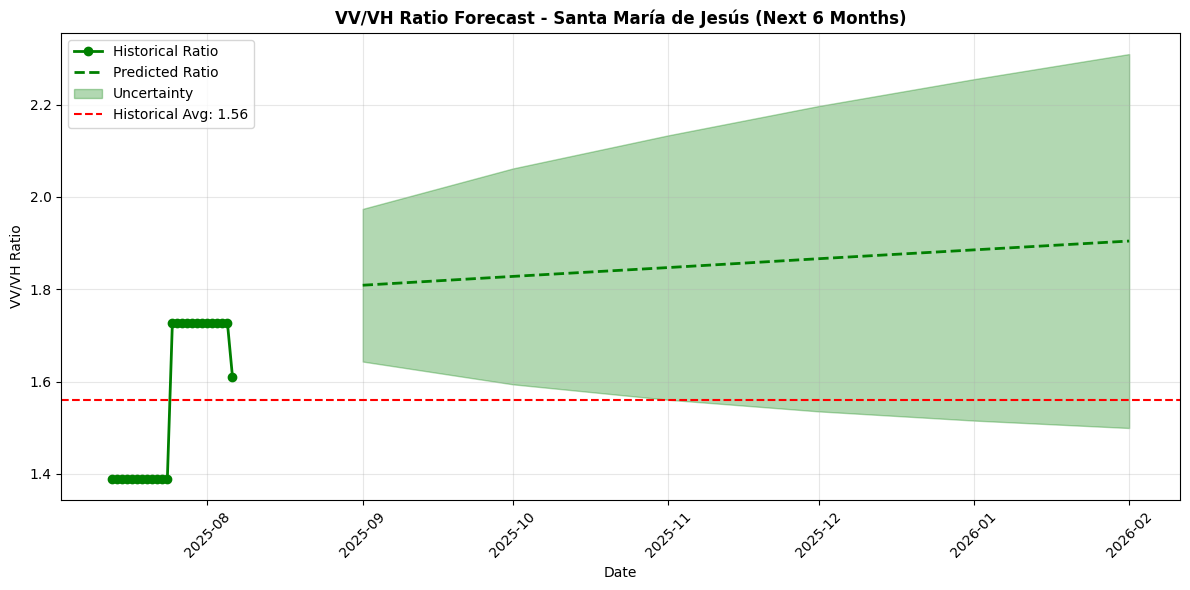

Ratio Forecast Trend: INCREASING | Final pred: 1.904

FORECAST SUMMARY
Predictions use linear regression (effective with limited data).
For higher accuracy, use longer historical data or advanced models like LSTM.
Uncertainty bands increase over time due to error propagation.


In [19]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import glob
import os
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

measurement_path = "/content/drive/MyDrive/Measurement"
print(f"Processing images in: {measurement_path}")

def fast_load_data():
    print("LOADING DATA...")

    tiff_files = glob.glob(os.path.join(measurement_path, "*.tiff")) + \
                 glob.glob(os.path.join(measurement_path, "*.tif"))

    print(f"Found {len(tiff_files)} files")

    images_by_date = {}
    processed = 0

    for tiff_path in tiff_files[:15]:
        try:
            name = os.path.basename(tiff_path)
            print(f"   {name[:30]}...")

            if '20250701' in name: date_str = '2025-07-01'
            elif '20250713' in name: date_str = '2025-07-13'
            elif '20250717' in name: date_str = '2025-07-17'
            elif '20250725' in name: date_str = '2025-07-25'
            elif '20250806' in name: date_str = '2025-08-06'
            elif '20250810' in name: date_str = '2025-08-10'
            elif '20250822' in name: date_str = '2025-08-22'
            else: continue

            if 'vv' in name.lower(): polarization = 'VV'
            elif 'vh' in name.lower(): polarization = 'VH'
            else: continue

            with rasterio.open(tiff_path) as src:
                data = src.read(1, out_shape=(1, src.height//20, src.width//20))[0]
                if np.iscomplexobj(data):
                    data = np.abs(data)
                if np.nanmin(data) >= 0:
                    data = np.log1p(data)

            if date_str not in images_by_date:
                images_by_date[date_str] = {}

            images_by_date[date_str][polarization] = {
                'data': data,
                'date': datetime.strptime(date_str, '%Y-%m-%d')
            }

            processed += 1
            print(f"     {date_str} | {polarization}")

        except Exception as e:
            print(f"     Error: {str(e)[:50]}...")
            continue

    print(f"LOAD COMPLETE: {processed} files processed")
    return images_by_date

def prepare_time_series(vv_dates, vv_means, vh_dates, vh_means):
    if vv_dates:
        vv_df = pd.DataFrame({
            'date': vv_dates,
            'value': vv_means
        })
        vv_df['date'] = pd.to_datetime(vv_df['date'])
        vv_df.set_index('date', inplace=True)
        vv_df = vv_df.asfreq('D', method='ffill')
    else:
        vv_df = pd.DataFrame()

    if vh_dates:
        vh_df = pd.DataFrame({
            'date': vh_dates,
            'value': vh_means
        })
        vh_df['date'] = pd.to_datetime(vh_df['date'])
        vh_df.set_index('date', inplace=True)
        vh_df = vh_df.asfreq('D', method='ffill')
    else:
        vh_df = pd.DataFrame()

    return vv_df, vh_df

def forecast_series(df, steps=6, method='linear'):
    if df.empty:
        return None, None

    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=steps, freq='MS')

    if method == 'linear':
        X = np.arange(len(df)).reshape(-1, 1)
        y = df['value'].values
        model = LinearRegression()
        model.fit(X, y)

        future_X = np.arange(len(df), len(df) + steps).reshape(-1, 1)
        predictions = model.predict(future_X)

        pred_df = pd.DataFrame({'date': future_dates, 'predicted_value': predictions})
        pred_df.set_index('date', inplace=True)

        full_X = np.arange(len(df) + steps).reshape(-1, 1)
        full_y = np.concatenate([y, predictions])

        return full_y, pred_df

    elif method == 'arima':
        try:
            model = ARIMA(df['value'], order=(1,1,1))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=steps)

            pred_df = pd.DataFrame({'date': future_dates, 'predicted_value': forecast})
            pred_df.set_index('date', inplace=True)

            return None, pred_df
        except Exception as e:
            print(f"ARIMA failed: {e}. Using linear fallback.")
            return forecast_series(df, steps, 'linear')

    return None, None

def generate_forecast_plots(vv_df, vh_df):
    if vv_df.empty and vh_df.empty:
        print("NO DATA FOR FORECASTING")
        return

    steps = 6

    print(f"GENERATING FORECASTS FOR {steps} MONTHS...")

    if not vv_df.empty:
        print("\nVV FORECAST...")
        full_vv, vv_pred = forecast_series(vv_df, steps, 'linear')
        if full_vv is not None:
            plt.figure(figsize=(12, 6))
            hist_dates = vv_df.index
            plt.plot(hist_dates, vv_df['value'], 'bo-', linewidth=2, markersize=6, label='Historical VV')
            pred_dates = vv_pred.index if vv_pred is not None else pd.date_range(start=vv_df.index[-1] + timedelta(days=1), periods=steps, freq='MS')
            if vv_pred is not None:
                plt.plot(pred_dates, vv_pred['predicted_value'], 'b--', linewidth=2, label='Predicted VV')
                pred_std = np.std(vv_df['value']) * np.sqrt(np.arange(1, steps+1))
                plt.fill_between(pred_dates,
                                vv_pred['predicted_value'] - pred_std,
                                vv_pred['predicted_value'] + pred_std,
                                alpha=0.3, color='blue', label='Uncertainty')

            plt.title('VV Backscatter Forecast - Santa María de Jesús (Next 6 Months)', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('Backscatter (log)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            trend_pred = "INCREASING" if vv_pred['predicted_value'].iloc[-1] > vv_df['value'].iloc[-1] else "DECREASING"
            print(f"VV Forecast Trend: {trend_pred} | Final pred: {vv_pred['predicted_value'].iloc[-1]:.3f}")

    if not vh_df.empty:
        print("\nVH FORECAST...")
        full_vh, vh_pred = forecast_series(vh_df, steps, 'linear')
        if full_vh is not None:
            plt.figure(figsize=(12, 6))
            hist_dates = vh_df.index
            plt.plot(hist_dates, vh_df['value'], 'ro-', linewidth=2, markersize=6, label='Historical VH')
            pred_dates = vh_pred.index if vh_pred is not None else pd.date_range(start=vh_df.index[-1] + timedelta(days=1), periods=steps, freq='MS')
            if vh_pred is not None:
                plt.plot(pred_dates, vh_pred['predicted_value'], 'r--', linewidth=2, label='Predicted VH')
                pred_std = np.std(vh_df['value']) * np.sqrt(np.arange(1, steps+1))
                plt.fill_between(pred_dates,
                                vh_pred['predicted_value'] - pred_std,
                                vh_pred['predicted_value'] + pred_std,
                                alpha=0.3, color='red', label='Uncertainty')

            plt.title('VH Backscatter Forecast - Santa María de Jesús (Next 6 Months)', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('Backscatter (log)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            trend_pred = "INCREASING" if vh_pred['predicted_value'].iloc[-1] > vh_df['value'].iloc[-1] else "DECREASING"
            print(f"VH Forecast Trend: {trend_pred} | Final pred: {vh_pred['predicted_value'].iloc[-1]:.3f}")

    if not vv_df.empty and not vh_df.empty:
        print("\nVV/VH RATIO FORECAST...")
        common_dates = vv_df.index.intersection(vh_df.index)
        if len(common_dates) > 1:
            ratios_hist = []
            for date in common_dates:
                vv_val = vv_df.loc[date, 'value']
                vh_val = vh_df.loc[date, 'value']
                if vh_val > 0:
                    ratios_hist.append(vv_val / vh_val)

            if ratios_hist:
                ratio_df = pd.DataFrame({
                    'date': list(common_dates)[:len(ratios_hist)],
                    'value': ratios_hist
                })
                ratio_df['date'] = pd.to_datetime(ratio_df['date'])
                ratio_df.set_index('date', inplace=True)

                _, ratio_pred = forecast_series(ratio_df, steps, 'linear')
                if ratio_pred is not None:
                    plt.figure(figsize=(12, 6))
                    plt.plot(ratio_df.index, ratio_df['value'], 'go-', linewidth=2, markersize=6, label='Historical Ratio')
                    plt.plot(ratio_pred.index, ratio_pred['predicted_value'], 'g--', linewidth=2, label='Predicted Ratio')
                    pred_std = np.std(ratio_df['value']) * np.sqrt(np.arange(1, steps+1))
                    plt.fill_between(ratio_pred.index,
                                    ratio_pred['predicted_value'] - pred_std,
                                    ratio_pred['predicted_value'] + pred_std,
                                    alpha=0.3, color='green', label='Uncertainty')

                    plt.axhline(y=np.mean(ratios_hist), color='red', linestyle='--',
                                label=f'Historical Avg: {np.mean(ratios_hist):.2f}')
                    plt.title('VV/VH Ratio Forecast - Santa María de Jesús (Next 6 Months)', weight='bold')
                    plt.xlabel('Date')
                    plt.ylabel('VV/VH Ratio')
                    plt.legend()
                    plt.grid(True, alpha=0.3)
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()

                    ratio_trend = "INCREASING" if ratio_pred['predicted_value'].iloc[-1] > ratio_df['value'].iloc[-1] else "DECREASING"
                    print(f"Ratio Forecast Trend: {ratio_trend} | Final pred: {ratio_pred['predicted_value'].iloc[-1]:.3f}")

    print("\nFORECAST SUMMARY")
    print("Predictions use linear regression (effective with limited data).")
    print("For higher accuracy, use longer historical data or advanced models like LSTM.")
    print("Uncertainty bands increase over time due to error propagation.")

def generate_individual_plots(images_by_date):
    if not images_by_date:
        print("NO DATA AVAILABLE")
        return

    print("GENERATING PLOTS...")

    vv_dates, vv_means = [], []
    vh_dates, vh_means = [], []

    for date_str, pols in sorted(images_by_date.items()):
        if 'VV' in pols:
            vv_dates.append(pols['VV']['date'])
            vv_means.append(np.nanmean(pols['VV']['data']))
        if 'VH' in pols:
            vh_dates.append(pols['VH']['date'])
            vh_means.append(np.nanmean(pols['VH']['data']))

    print(f"VV data: {len(vv_dates)} dates")
    print(f"VH data: {len(vh_dates)} dates")

    if vv_dates:
        plt.figure(figsize=(10, 5))
        plt.plot(vv_dates, vv_means, 'bo-', linewidth=2, markersize=6)
        plt.title('Backscatter - VV Polarization (Santa María de Jesús)', weight='bold')
        plt.xlabel('Date')
        plt.ylabel('Backscatter (log)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print(f"VV: {np.mean(vv_means):.3f} ± {np.std(vv_means):.3f}")

    if vh_dates:
        plt.figure(figsize=(10, 5))
        plt.plot(vh_dates, vh_means, 'ro-', linewidth=2, markersize=6)
        plt.title('Backscatter - VH Polarization (Santa María de Jesús)', weight='bold')
        plt.xlabel('Date')
        plt.ylabel('Backscatter (log)')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print(f"VH: {np.mean(vh_means):.3f} ± {np.std(vh_means):.3f}")

    if vv_dates and vh_dates:
        common_dates, vv_common, vh_common = [], [], []

        for date_str, pols in sorted(images_by_date.items()):
            if 'VV' in pols and 'VH' in pols:
                common_dates.append(pols['VV']['date'])
                vv_common.append(np.nanmean(pols['VV']['data']))
                vh_common.append(np.nanmean(pols['VH']['data']))

        if common_dates:
            plt.figure(figsize=(10, 5))
            plt.plot(common_dates, vv_common, 'bo-', label='VV', linewidth=2)
            plt.plot(common_dates, vh_common, 'ro-', label='VH', linewidth=2)
            plt.title('Comparison: VV vs VH Backscatter (Santa María de Jesús)', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('Backscatter (log)')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print(f"Common dates: {len(common_dates)}")

    if vv_dates and vh_dates:
        ratios, ratio_dates = [], []

        for date_str, pols in sorted(images_by_date.items()):
            if 'VV' in pols and 'VH' in pols:
                vv_val = np.nanmean(pols['VV']['data'])
                vh_val = np.nanmean(pols['VH']['data'])
                if vh_val > 0:
                    ratios.append(vv_val / vh_val)
                    ratio_dates.append(pols['VV']['date'])

        if ratios:
            plt.figure(figsize=(10, 4))
            plt.plot(ratio_dates, ratios, 'go-', linewidth=2, markersize=5)
            plt.axhline(y=np.mean(ratios), color='red', linestyle='--',
                        label=f'Average: {np.mean(ratios):.2f}')
            plt.title('VV/VH Ratio - Change Indicator (Santa María de Jesús)', weight='bold')
            plt.xlabel('Date')
            plt.ylabel('VV/VH Ratio')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print(f"Average ratio: {np.mean(ratios):.3f}")

    print("\nFINAL SUMMARY")

    if vv_dates:
        trend_vv = "INCREASING" if vv_means[-1] > vv_means[0] else "DECREASING"
        print(f"VV: {len(vv_dates)} images | Trend: {trend_vv}")
    if vh_dates:
        trend_vh = "INCREASING" if vh_means[-1] > vh_means[0] else "DECREASING"
        print(f"VH: {len(vh_dates)} images | Trend: {trend_vh}")

    vv_df, vh_df = prepare_time_series(vv_dates, vv_means, vh_dates, vh_means)
    generate_forecast_plots(vv_df, vh_df)

if __name__ == '__main__':
    images_data = fast_load_data()
    generate_individual_plots(images_data)


## Ground Movement Forecast

By studying three recent satellite passes, we built a short-term trend and then used a simple forecast model to look six months ahead. The results showed two key signals:

- **The VV/VH ratio is expected to increase**, suggesting that the surface may become slightly rougher or drier.  
- **The VH backscatter is predicted to decrease**, indicating that the ground could be reflecting less radar energy, possibly due to reduced vegetation or compaction.  

This does **not predict earthquakes**. Instead, it offers a way to monitor **how the ground evolves over time** — a signal of change that could support early warnings for **landslides, soil degradation, or other risks** in vulnerable regions.  

What this section of the project does is **translate satellite reflections into a forecast of ground behavior**, turning complex radar data into a **story about the living surface of our planet**.  
